In [1]:
import yfinance as yf
import pandas as pd

# Download stock data for multiple tickers with dividends and splits
df = yf.download(["AAPL", "NVDA"], start="2024-01-01", end="2025-12-31", actions=True)

print(df.head())

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  2 of 2 completed

Price            Close            Dividends             High             \
Ticker            AAPL       NVDA      AAPL NVDA        AAPL       NVDA   
Date                                                                      
2024-01-02  184.290421  48.149918       0.0  0.0  187.070068  49.276493   
2024-01-03  182.910522  47.551144       0.0  0.0  184.528677  48.165911   
2024-01-04  180.587540  47.979984       0.0  0.0  181.758954  48.481795   
2024-01-05  179.862823  49.078564       0.0  0.0  181.431339  49.528395   
2024-01-08  184.210999  52.233379       0.0  0.0  184.250716  52.255374   

Price              Low                   Open            Stock Splits       \
Ticker            AAPL       NVDA        AAPL       NVDA         AAPL NVDA   
Date                                                                         
2024-01-02  182.553143  47.577135  185.789438  49.225514          0.0  0.0   
2024-01-03  182.096477  47.302237  182.880742  47.467176          0.0  0.0   
2024-01-0

In [4]:
import talib

# Calculate indicators for each ticker
for ticker in df['Close'].columns:
    df['RSI', ticker] = talib.RSI(df['Close'][ticker], timeperiod=14)
    df['MA_50', ticker] = talib.SMA(df['Close'][ticker], timeperiod=50)
    df['MA_200', ticker] = talib.SMA(df['Close'][ticker], timeperiod=200)
    df['MACD', ticker], df['MACD_signal', ticker], df['MACD_hist', ticker] = talib.MACD(
        df['Close'][ticker], fastperiod=12, slowperiod=26, signalperiod=9
    )

In [5]:
import yfinance as yf

# Fetch data for AAPL
aapl = yf.Ticker("AAPL")
price_data = aapl.history(start="2022-01-01", end="2023-12-31")
print(price_data.head())

# Calculate daily returns
returns = price_data['Close'].pct_change()
print("Daily returns:\n", returns.tail())

                                 Open        High         Low       Close  \
Date                                                                        
2022-01-03 00:00:00-05:00  174.542917  179.499574  174.425140  178.645645   
2022-01-04 00:00:00-05:00  179.254221  179.558489  175.809091  176.378372   
2022-01-05 00:00:00-05:00  176.290001  176.839648  171.411868  171.686691   
2022-01-06 00:00:00-05:00  169.507737  172.059683  168.467333  168.820679   
2022-01-07 00:00:00-05:00  169.694226  170.921120  167.868606  168.987534   

                              Volume  Dividends  Stock Splits  
Date                                                           
2022-01-03 00:00:00-05:00  104487900        0.0           0.0  
2022-01-04 00:00:00-05:00   99310400        0.0           0.0  
2022-01-05 00:00:00-05:00   94537600        0.0           0.0  
2022-01-06 00:00:00-05:00   96904000        0.0           0.0  
2022-01-07 00:00:00-05:00   86709100        0.0           0.0  
Daily return

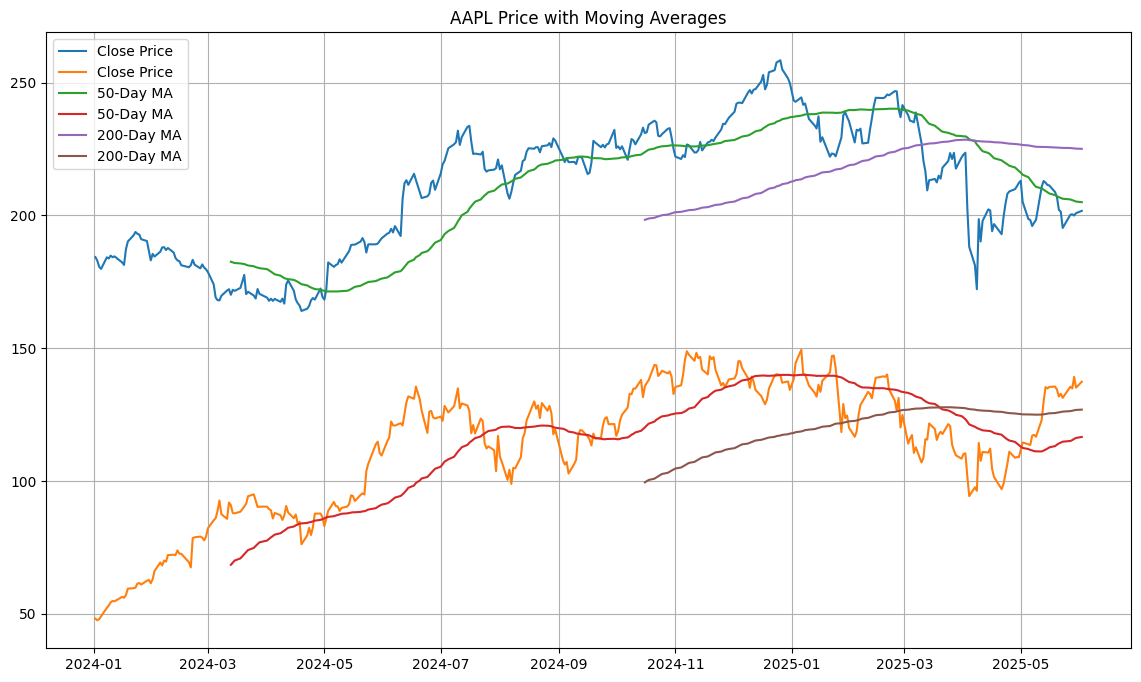

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))

# Plot closing price and moving averages
plt.plot(df['Close'], label='Close Price')
plt.plot(df['MA_50'], label='50-Day MA')
plt.plot(df['MA_200'], label='200-Day MA')
plt.title("AAPL Price with Moving Averages")
plt.legend()
plt.grid()
plt.show()


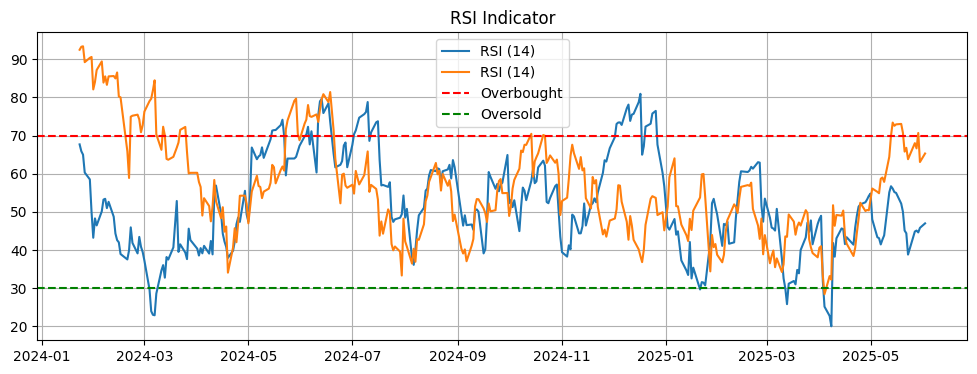

In [7]:
plt.figure(figsize=(12, 4))
plt.plot(df['RSI'], label='RSI (14)')
plt.axhline(70, color='r', linestyle='--', label='Overbought')
plt.axhline(30, color='g', linestyle='--', label='Oversold')
plt.title("RSI Indicator")
plt.legend()
plt.grid()
plt.show()


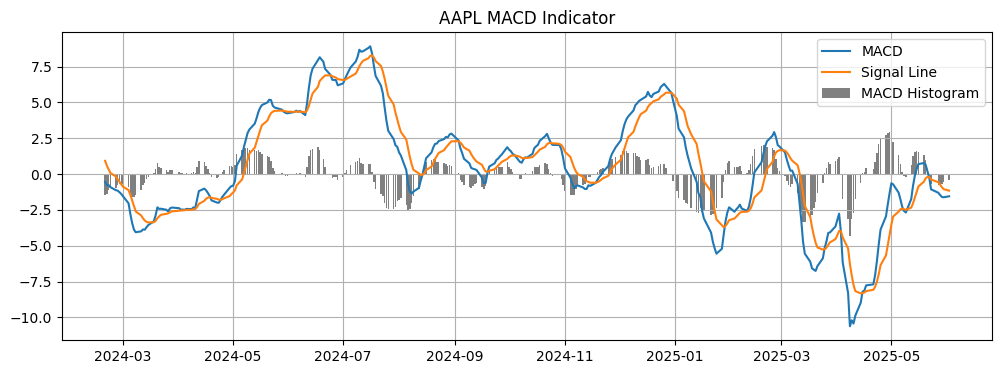

In [8]:
plt.figure(figsize=(12, 4))
plt.plot(df['MACD', 'AAPL'], label='MACD')
plt.plot(df['MACD_signal', 'AAPL'], label='Signal Line')
plt.bar(df.index, df['MACD_hist', 'AAPL'], label='MACD Histogram', color='gray')
plt.title("AAPL MACD Indicator")
plt.legend()
plt.grid()
plt.show()
